Loading Wisconsin Breast Cancer Dataset...
Performing K-means clustering with 2 clusters...
Cluster Centers:
[[ 0.98649786  0.49202131  1.01866689  0.97479724  0.5871176   1.014073
   1.14492245  1.17028266  0.60339021  0.22927434  0.86311672  0.04416341
   0.86446528  0.8137762   0.01228944  0.69281919  0.63976499  0.77166695
   0.13798752  0.40384985  1.05221312  0.51705679  1.07769473  1.01391704
   0.59804381  0.95285513  1.05144274  1.15328841  0.5994129   0.61362004]
 [-0.48677585 -0.24278217 -0.50264928 -0.48100231 -0.28970632 -0.50038248
  -0.56494861 -0.57746231 -0.29773585 -0.11313275 -0.42589487 -0.02179192
  -0.4265603  -0.40154836 -0.00606408 -0.34186354 -0.31568456 -0.38077004
  -0.06808833 -0.19927499 -0.51920227 -0.25513563 -0.53177588 -0.50030552
  -0.29509774 -0.47017523 -0.51882214 -0.56907669 -0.29577329 -0.30278364]]
Cluster Labels: [0 1]

Clustering Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

   malignant       0.

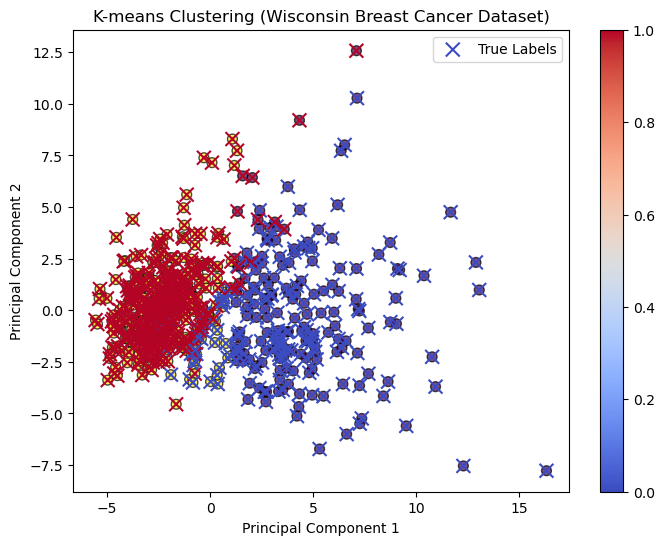

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



def load_data():
    print("Loading Wisconsin Breast Cancer Dataset...")
    data = load_breast_cancer()
    X = data.data  
    y = data.target  
    return X, y, data.feature_names, data.target_names


def kmeans_clustering(X, n_clusters=2):
    print(f"Performing K-means clustering with {n_clusters} clusters...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans


def visualize_clustering(X, kmeans, y):
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7, edgecolors='k')

    
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', marker='x', s=100, label="True Labels")

    plt.title("K-means Clustering (Wisconsin Breast Cancer Dataset)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.colorbar()
    plt.show()


def main():
    
    X, y, feature_names, target_names = load_data()

    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    

    kmeans = kmeans_clustering(X_scaled)

    
    
    print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
    print(f"Cluster Labels: {np.unique(kmeans.labels_)}")

    
    accuracy = accuracy_score(y, kmeans.labels_)
    print(f"\nClustering Accuracy: {accuracy:.2f}")

    
    print("\nClassification Report:\n", classification_report(y, kmeans.labels_, target_names=target_names))
    print("\nConfusion Matrix:\n", confusion_matrix(y, kmeans.labels_))

    
    visualize_clustering(X_scaled, kmeans, y)


if __name__ == "__main__":
    main()